In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from bids.layout import BIDSLayout
from bids.modeling import BIDSStatsModelsGraph
from nilearn.plotting import plot_design_matrix

In [2]:
root = '/Users/jeanettemumford/Dropbox/Research/Projects/hrf_compare_pybids_nilearn/test_model_spec/ds000171'
db_path = '/Users/jeanettemumford/Dropbox/Research/Projects/hrf_compare_pybids_nilearn/test_model_spec/ds000171/dbcache'
reset_database = True
spec_path = '/Users/jeanettemumford/Dropbox/Research/Projects/hrf_compare_pybids_nilearn/test_model_spec/model_spec/fir_model_spec.json'

In [3]:
layout = BIDSLayout(root=root, database_path=db_path, reset_database=reset_database)


In [4]:
spec = json.loads(Path(spec_path).read_text())


In [5]:
graph = BIDSStatsModelsGraph(layout, spec)
graph.load_collections(scan_length=105 * 3)

In [6]:
root_node = graph.root_node
colls = root_node.get_collections()
first_sub = colls[0]

In [7]:
events_data = first_sub.to_df(entities=False)

print(events_data)


    duration  onset      trial_type
0        3.0   33.0        response
1        3.0   67.5        response
2        3.0  102.0        response
3        3.0  136.5        response
4        3.0  171.0        response
5        3.0  205.5        response
6        3.0  240.0        response
7        3.0  274.5        response
8        3.0  309.0        response
9       31.5   36.0  negative_music
10      31.5   70.5           tones
11      31.5  105.0  positive_music
12      31.5  139.5           tones
13      31.5  174.0  negative_music
14      31.5  208.5           tones
15      31.5  243.0  positive_music
16      31.5  277.5           tones
17      33.0    0.0           tones


In [8]:
graph.model['nodes'][0]['transformations']


{'transformer': 'pybids-transforms-v1',
 'instructions': [{'name': 'Factor', 'input': ['trial_type']},
  {'name': 'Convolve',
   'model': 'fir',
   'fir_delays': [0, 3, 6],
   'input': ['trial_type.*']}]}

In [9]:
outputs = root_node.run(
    group_by=root_node.group_by, force_dense=False, transformation_history=True
)

In [10]:
outputs


[<BIDSStatsModelsNodeOutput(name=run_level, entities={'run': 1, 'subject': 'control01'})>]

In [11]:
first_output = outputs[0]
first_output

<BIDSStatsModelsNodeOutput(name=run_level, entities={'run': 1, 'subject': 'control01'})>

In [12]:
first_output.X


,intercept,trial_type.positive_music_0,trial_type.positive_music_3,trial_type.positive_music_6,trial_type.negative_music_0,trial_type.negative_music_3,trial_type.negative_music_6,trial_type.tones_0,trial_type.tones_3,trial_type.tones_6
0,1.0,-2.361369e-16,-1.273191e-16,-2.634604e-17,-5.537850e-07,-2.218010e-08,4.177100e-07,0.999999,5.979157e-07,0.000002
1,1.0,5.271936e-16,2.320947e-16,-3.165612e-17,8.955737e-07,-4.802374e-07,-1.570830e-06,1.000000,1.143781e+00,1.122154
2,1.0,-1.112356e-15,-3.239496e-16,3.543453e-16,-8.065018e-07,2.696967e-06,5.342924e-06,1.000003,9.488377e-01,0.955810
3,1.0,2.139782e-15,6.481437e-17,-1.650234e-15,-2.096990e-06,-1.085939e-05,-1.711089e-05,0.999981,1.018835e+00,1.016184
4,1.0,-3.424088e-15,1.947993e-15,6.199910e-15,1.676178e-05,3.821699e-05,5.248913e-05,1.000079,9.933965e-01,0.994440
...,...,...,...,...,...,...,...,...,...,...
100,1.0,-2.104715e-05,-2.187164e-05,-2.050911e-05,-4.004625e-15,-3.646752e-15,-2.818255e-15,0.973744,9.758585e-01,0.979750
101,1.0,7.804838e-06,7.784433e-06,6.918493e-06,1.409374e-15,1.209563e-15,8.363021e-16,1.073730,1.066664e+00,1.054651
102,1.0,-2.834433e-06,-2.689097e-06,-2.222090e-06,-4.798429e-16,-3.789020e-16,-2.154221e-16,0.535398,6.342055e-01,0.727895
103,1.0,9.650163e-07,8.194701e-07,5.542352e-07,1.410869e-16,8.695574e-17,1.184733e-17,-0.072449,-6.227009e-02,-0.040894


<Axes: label='conditions', ylabel='scan number'>

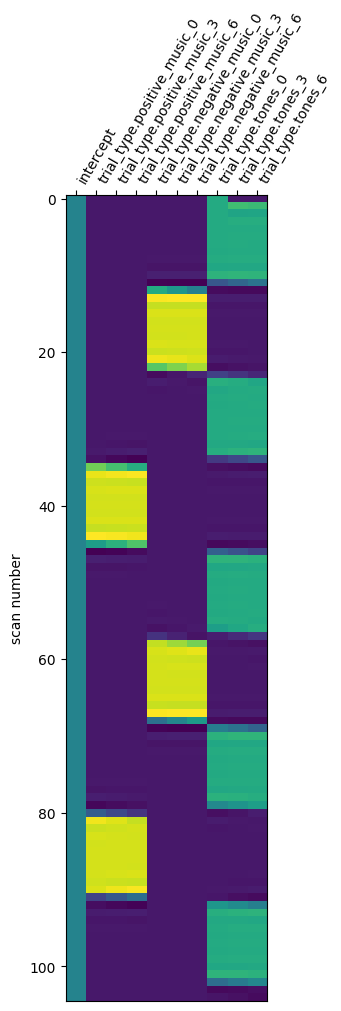

In [13]:
plot_design_matrix(first_output.X)


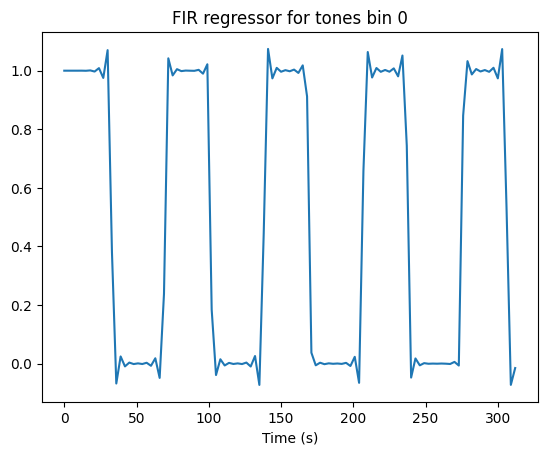

In [14]:
frame_times = np.arange(first_output.X.shape[0]) * 3
plt.plot(frame_times, first_output.X['trial_type.tones_0'])
plt.title('FIR regressor for tones bin 0')
plt.xlabel('Time (s)')
plt.show()

In [15]:
events_data_sorted = events_data.sort_values(by='onset')
events_data_sorted

,duration,onset,trial_type
17,33.0,0.0,tones
0,3.0,33.0,response
9,31.5,36.0,negative_music
1,3.0,67.5,response
10,31.5,70.5,tones
2,3.0,102.0,response
11,31.5,105.0,positive_music
3,3.0,136.5,response
12,31.5,139.5,tones
4,3.0,171.0,response


# Processing debugging output
I'm looking at the convolve output prior to running `DenseRunVariables`

This is for trial_type.negative_music

In [16]:
import pickle

with open('fir_tuple.pkl', 'rb') as f:
    mytuple = pickle.load(f)

print(mytuple)

(array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], shape=(3150, 3)), ['cond_delay_0', 'cond_delay_3', 'cond_delay_6'])


In [17]:
reg_array, names = mytuple

reg_array.shape

(3150, 3)

## Side note about oversampling
If I checked this correctly, `hrf.compute_regressor` is using a much, much lower value for oversampling.  Using 1 instead of 50 seems like an unusual choice.

Oversampling is set to 1, which seems really low (default is 50)


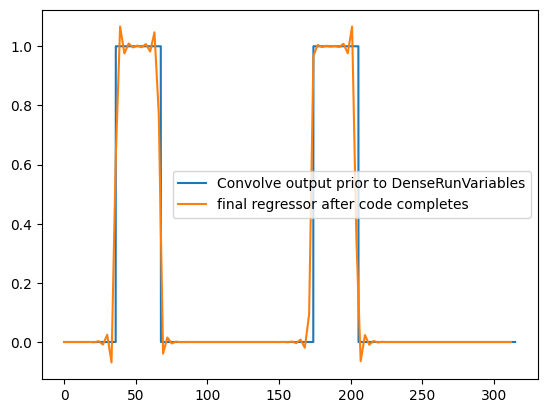

In [18]:
# Values from debugger and oversampling calculation is from the Convolve class
effective_sr = 1.3333
sampling_rate = 10
oversampling = int(np.ceil(effective_sr / sampling_rate))
print(
    f'Oversampling is set to {oversampling}, which seems really low (default is 50)'
)  # Weird that the oversampling is 1

# I verified these frame times are correct in the debugger
frame_times_dense = np.arange(reg_array.shape[0]) / 10
plt.plot(
    frame_times_dense,
    reg_array[:, 0],
    label='Convolve output prior to DenseRunVariables',
)
plt.plot(
    frame_times,
    first_output.X['trial_type.negative_music_0'],
    label='final regressor after code completes',
)
plt.legend()
plt.show()